Notebook for visualization of accuracies, CER, losses

In [1]:
import json 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import re 
import os 

In [2]:
ip_file = open('D:\Programming\Projects\major_project\Codes\ASR\\test_results_csv\\final_test_result.json')
results = json.load(ip_file)
# results

Convert dictionary to dataframe

In [3]:
df1 = pd.DataFrame(results)
df1 = df1.T
df1

,Average WER,Average WER Accuracy,Average CER,Average CER Accuracy
model_0.1_10000_15000,0.678804,0.321196,0.180806,0.819194
model_0.1_30000_35000,0.819565,0.180435,0.415166,0.584834
model_0.1_35k_40k,0.849457,0.150543,0.392585,0.607415
model_0.1_25k_30k_lt_0.4sec,0.808152,0.191848,0.394492,0.605508
model_0.1_5000_10000,0.562500,0.437500,0.313015,0.686985
model_0.1_50k_55k,0.927174,0.072826,0.581630,0.418370
model_0.1_45k_50k,0.917935,0.082065,0.542341,0.457659
model_0.1_55k_60k,0.911957,0.088043,0.571636,0.428364
model_0.1_15000_20000,0.746196,0.253804,0.232606,0.767394
model_0.1_60k_65k,0.941304,0.058696,0.650671,0.349329


In [4]:
df1['index'] = 0

In [5]:
df1['model_name'] = ''

In [6]:
df1['duration'] = ''
df1['data_count'] = 0

In [7]:
df1.loc['model_0.1_dropout_5_10sec','index'] = 1
df1.loc['model-4-5sec-0.1dropout','index'] = 2 
df1.loc['model-lt-4sec-first-5000','index'] = 3 
df1.loc['model_0.1_5000_10000','index'] = 4 
df1.loc['model_0.1_10000_15000','index'] = 5
df1.loc['model_0.1_15000_20000','index'] = 6
df1.loc['model_0.1_20k_25k_lt_4sec','index'] = 7
df1.loc['model_0.1_25k_30k_lt_0.4sec','index'] = 8
df1.loc['model_0.1_30000_35000','index'] = 9
df1.loc['model_0.1_35k_40k','index'] = 10
df1.loc['model_0.1_40k_45k','index'] = 11
df1.loc['model_0.1_45k_50k','index'] = 12
df1.loc['model_0.1_50k_55k','index'] = 13
df1.loc['model_0.1_55k_60k','index'] = 14
df1.loc['model_0.1_60k_65k','index'] = 15
df1.loc['model_0.1_65k_above','index'] = 16

In [8]:
df1.loc['model_0.1_dropout_5_10sec','model_name'] = 'M_5_10s'
df1.loc['model-4-5sec-0.1dropout','model_name'] = 'M_4_5s'
df1.loc['model-lt-4sec-first-5000','model_name'] = 'M_lt_4s_5k' 
df1.loc['model_0.1_5000_10000','model_name'] = 'M_<4s_5k_10k' 
df1.loc['model_0.1_10000_15000','model_name'] = 'M_<4s_10k_15k'
df1.loc['model_0.1_15000_20000','model_name'] = 'M_<4s_15k_20k'
df1.loc['model_0.1_20k_25k_lt_4sec','model_name'] = 'M_<4s_20k_25k'
df1.loc['model_0.1_25k_30k_lt_0.4sec','model_name'] = 'M_<4s_25k_30k'
df1.loc['model_0.1_30000_35000','model_name'] = 'M_<4s_30k_35k'
df1.loc['model_0.1_35k_40k','model_name'] = 'M_<4s_35k_40k'
df1.loc['model_0.1_40k_45k','model_name'] = 'M_<4s_40k_45k'
df1.loc['model_0.1_45k_50k','model_name'] = 'M_<4s_45k_50k'
df1.loc['model_0.1_50k_55k','model_name'] = 'M_<4s_50k_55k'
df1.loc['model_0.1_55k_60k','model_name'] = 'M_<4s_55k_60k'
df1.loc['model_0.1_60k_65k','model_name'] = 'M_<4s_60k_65k'
df1.loc['model_0.1_65k_above','model_name'] = 'M_<4s_>65k'

In [9]:
df1.loc['model_0.1_dropout_5_10sec','duration'] = '5_10'
df1.loc['model-4-5sec-0.1dropout','duration'] = '4_5'
df1.loc['model-lt-4sec-first-5000','duration'] = 'lt_4' 
df1.loc['model_0.1_5000_10000','duration'] = 'lt_4' 
df1.loc['model_0.1_10000_15000','duration'] = 'lt_4'
df1.loc['model_0.1_15000_20000','duration'] = 'lt_4'
df1.loc['model_0.1_20k_25k_lt_4sec','duration'] = 'lt_4'
df1.loc['model_0.1_25k_30k_lt_0.4sec','duration'] = 'lt_4'
df1.loc['model_0.1_30000_35000','duration'] = 'lt_4'
df1.loc['model_0.1_35k_40k','duration'] = 'lt_4'
df1.loc['model_0.1_40k_45k','duration'] = 'lt_4'
df1.loc['model_0.1_45k_50k','duration'] = 'lt_4'
df1.loc['model_0.1_50k_55k','duration'] = 'lt_4'
df1.loc['model_0.1_55k_60k','duration'] = 'lt_4'
df1.loc['model_0.1_60k_65k','duration'] = 'lt_4'
df1.loc['model_0.1_65k_above','duration'] = 'lt_4'

In [10]:
df1.loc['model_0.1_dropout_5_10sec','data_count'] = 3231
df1.loc['model-4-5sec-0.1dropout','data_count'] = 4543
df1.loc['model-lt-4sec-first-5000','data_count'] = 5000 
df1.loc['model_0.1_5000_10000','data_count'] = 5000 
df1.loc['model_0.1_10000_15000','data_count'] = 5000
df1.loc['model_0.1_15000_20000','data_count'] = 5000
df1.loc['model_0.1_20k_25k_lt_4sec','data_count'] = 5000
df1.loc['model_0.1_25k_30k_lt_0.4sec','data_count'] = 5000
df1.loc['model_0.1_30000_35000','data_count'] = 5000
df1.loc['model_0.1_35k_40k','data_count'] = 5000
df1.loc['model_0.1_40k_45k','data_count'] = 5000
df1.loc['model_0.1_45k_50k','data_count'] = 5000
df1.loc['model_0.1_50k_55k','data_count'] = 5000
df1.loc['model_0.1_55k_60k','data_count'] = 5000
df1.loc['model_0.1_60k_65k','data_count'] = 5000
df1.loc['model_0.1_65k_above','data_count'] = 7443

In [11]:
df1.head()

,Average WER,Average WER Accuracy,Average CER,Average CER Accuracy,index,model_name,duration,data_count
model_0.1_10000_15000,0.678804,0.321196,0.180806,0.819194,5,M_<4s_10k_15k,lt_4,5000
model_0.1_30000_35000,0.819565,0.180435,0.415166,0.584834,9,M_<4s_30k_35k,lt_4,5000
model_0.1_35k_40k,0.849457,0.150543,0.392585,0.607415,10,M_<4s_35k_40k,lt_4,5000
model_0.1_25k_30k_lt_0.4sec,0.808152,0.191848,0.394492,0.605508,8,M_<4s_25k_30k,lt_4,5000
model_0.1_5000_10000,0.562500,0.437500,0.313015,0.686985,4,M_<4s_5k_10k,lt_4,5000


In [12]:
df1.sort_values(by=['index'],inplace=True)
df1.head()

,Average WER,Average WER Accuracy,Average CER,Average CER Accuracy,index,model_name,duration,data_count
model_0.1_dropout_5_10sec,0.510326,0.489674,0.115578,0.884422,1,M_5_10s,5_10,3231
model-4-5sec-0.1dropout,0.473370,0.526630,0.103906,0.896094,2,M_4_5s,4_5,4543
model-lt-4sec-first-5000,0.444565,0.555435,0.102304,0.897696,3,M_lt_4s_5k,lt_4,5000
model_0.1_5000_10000,0.562500,0.437500,0.313015,0.686985,4,M_<4s_5k_10k,lt_4,5000
model_0.1_10000_15000,0.678804,0.321196,0.180806,0.819194,5,M_<4s_10k_15k,lt_4,5000


In [13]:
df1 = df1.loc[:,["index","model_name","Average WER","Average WER Accuracy","Average CER","Average CER Accuracy","duration","data_count"]]
df1

,index,model_name,Average WER,Average WER Accuracy,Average CER,Average CER Accuracy,duration,data_count
model_0.1_dropout_5_10sec,1,M_5_10s,0.510326,0.489674,0.115578,0.884422,5_10,3231
model-4-5sec-0.1dropout,2,M_4_5s,0.473370,0.526630,0.103906,0.896094,4_5,4543
model-lt-4sec-first-5000,3,M_lt_4s_5k,0.444565,0.555435,0.102304,0.897696,lt_4,5000
model_0.1_5000_10000,4,M_<4s_5k_10k,0.562500,0.437500,0.313015,0.686985,lt_4,5000
model_0.1_10000_15000,5,M_<4s_10k_15k,0.678804,0.321196,0.180806,0.819194,lt_4,5000
model_0.1_15000_20000,6,M_<4s_15k_20k,0.746196,0.253804,0.232606,0.767394,lt_4,5000
model_0.1_20k_25k_lt_4sec,7,M_<4s_20k_25k,0.806522,0.193478,0.327281,0.672719,lt_4,5000
model_0.1_25k_30k_lt_0.4sec,8,M_<4s_25k_30k,0.808152,0.191848,0.394492,0.605508,lt_4,5000
model_0.1_30000_35000,9,M_<4s_30k_35k,0.819565,0.180435,0.415166,0.584834,lt_4,5000
model_0.1_35k_40k,10,M_<4s_35k_40k,0.849457,0.150543,0.392585,0.607415,lt_4,5000


In [14]:
df1.to_csv('test_results_csv',index=False)

In [2]:
df1 = pd.read_csv('D:\Programming\Projects\major_project\Codes\ASR\\notebooks\\test_results_csv')
df1

,index,model_name,Average WER,Average WER Accuracy,Average CER,Average CER Accuracy,duration,data_count
0,1,M_5_10s,0.510326,0.489674,0.115578,0.884422,5_10,3231
1,2,M_4_5s,0.473370,0.526630,0.103906,0.896094,4_5,4543
2,3,M_lt_4s_5k,0.444565,0.555435,0.102304,0.897696,lt_4,5000
3,4,M_<4s_5k_10k,0.562500,0.437500,0.313015,0.686985,lt_4,5000
4,5,M_<4s_10k_15k,0.678804,0.321196,0.180806,0.819194,lt_4,5000
5,6,M_<4s_15k_20k,0.746196,0.253804,0.232606,0.767394,lt_4,5000
6,7,M_<4s_20k_25k,0.806522,0.193478,0.327281,0.672719,lt_4,5000
7,8,M_<4s_25k_30k,0.808152,0.191848,0.394492,0.605508,lt_4,5000
8,9,M_<4s_30k_35k,0.819565,0.180435,0.415166,0.584834,lt_4,5000
9,10,M_<4s_35k_40k,0.849457,0.150543,0.392585,0.607415,lt_4,5000


Bar Plot for the distribution of the data in each model

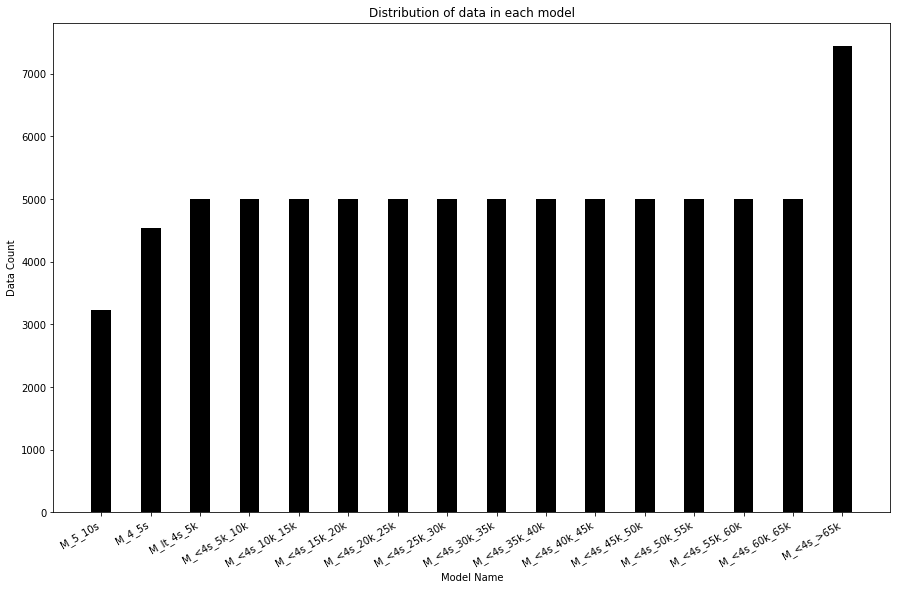

In [5]:
fig1 = plt.figure(figsize=(15,10))
plt.bar(df1["model_name"],df1["data_count"],width=0.4,color='k')
plt.xlabel('Model Name')
plt.ylabel('Data Count')
plt.title('Distribution of data in each model')
fig1.autofmt_xdate()
# plt.grid()
plt.show()

Testing CER and WER

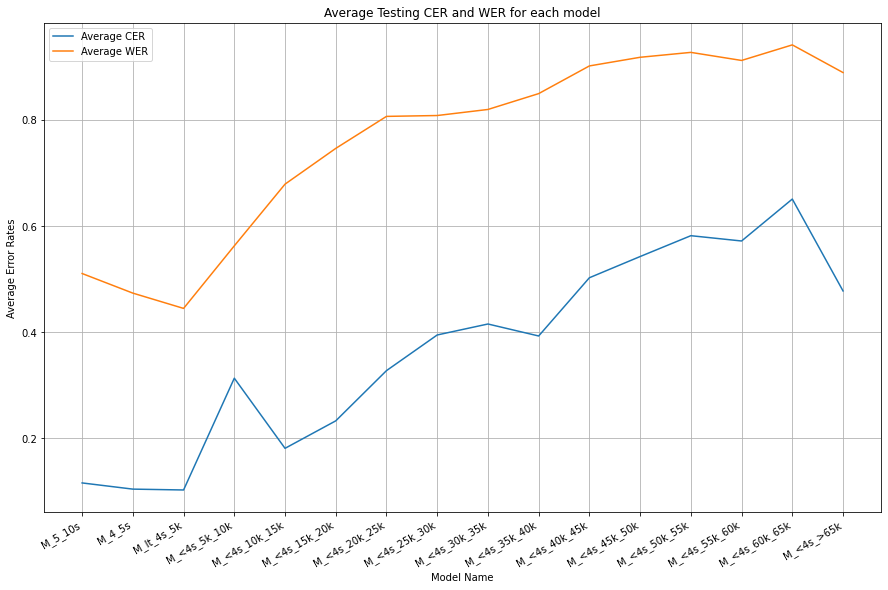

In [30]:
fig = plt.figure(figsize=(15,10))
plt.plot(df1["model_name"],df1["Average CER"], label="Average CER")
plt.plot(df1["model_name"],df1["Average WER"], label="Average WER")
plt.xlabel('Model Name')
plt.ylabel('Average Error Rates')
plt.title('Average Testing CER and WER for each model')
fig.autofmt_xdate()
plt.legend()
plt.grid()
plt.show()

Average CER and WER Accuracies

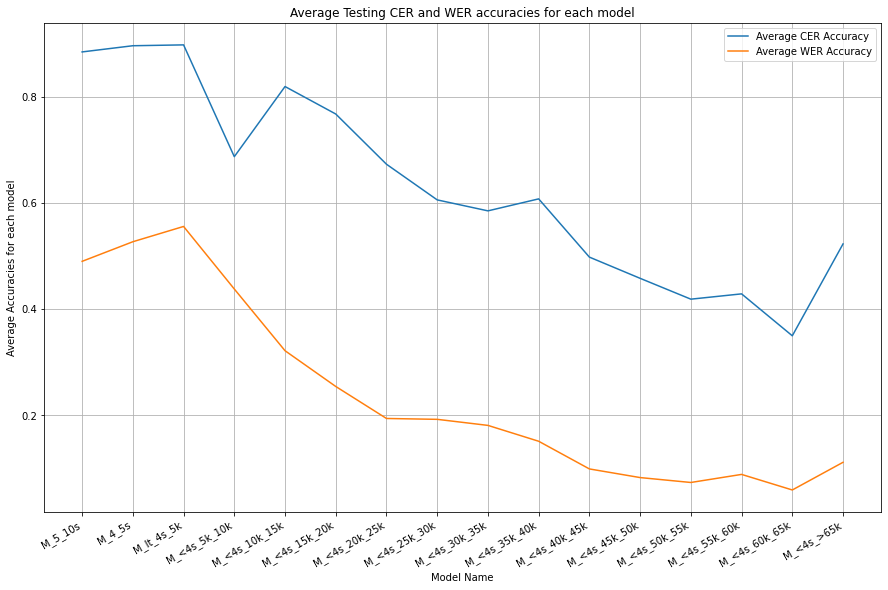

In [31]:
fig = plt.figure(figsize=(15,10))
plt.plot(df1["model_name"],df1["Average CER Accuracy"], label="Average CER Accuracy")
plt.plot(df1["model_name"],df1["Average WER Accuracy"], label="Average WER Accuracy")
plt.xlabel('Model Name')
plt.ylabel('Average Accuracies for each model')
plt.title('Average Testing CER and WER accuracies for each model')
fig.autofmt_xdate()
plt.legend()
plt.grid()
plt.show()

In [3]:
models = df1['model_name'].to_list()
training_losses = [0.1546,0.0937,0.097,0.0893,0.0964,0.0971,0.0921,0.099,0.0843,0.087,0.4357,0.3528,0.3493,0.097,0.4233,0.1114]
validation_losses = [0.5802,0.556409,0.3924,0.398492,0.367329,0.361957,0.340325,0.338688,0.349338,0.319932,0.221766,0.199463,0.201428,0.310647,0.201855,0.350858]
wers = [0.6041,0.660749,0.5483,0.598403,0.536869,0.574724,0.543865,0.559492,0.579749,0.546929,0.568539,0.571176,0.565832,0.586455,0.592920,0.641629]
cers = [0.1459,0.158605,0.1217,0.136498,0.130425,0.143738,0.146826,0.152074,0.164635,0.156845,0.171205,0.179254,0.184820,0.19148,0.205833,0.250614]
cer_accuracies = [0.8540,0.841395,0.8783,0.863502,0.869575,0.856262,0.853174,0.847926,0.835365,0.843155,0.828795,0.820746,0.81518,0.80852,0.794167,0.749386]
wer_accuracies = [(1-wer) for wer in wers]

For training

In [4]:
training_result = {
    'model_name': models,
    'Training Loss': training_losses,
    'Validation Loss': validation_losses,
    'WER': wers,
    'WER Accuracy': wer_accuracies,
    'CER': cers,
    'CER Accuracy': cer_accuracies
}

In [10]:
df2 = pd.DataFrame(training_result,columns=training_result.keys())
df2.to_csv('training_result.csv',index=False)
df2

,model_name,Training Loss,Validation Loss,WER,WER Accuracy,CER,CER Accuracy
0,M_5_10s,0.1546,0.580200,0.604100,0.395900,0.145900,0.854000
1,M_4_5s,0.0937,0.556409,0.660749,0.339251,0.158605,0.841395
2,M_lt_4s_5k,0.0970,0.392400,0.548300,0.451700,0.121700,0.878300
3,M_<4s_5k_10k,0.0893,0.398492,0.598403,0.401597,0.136498,0.863502
4,M_<4s_10k_15k,0.0964,0.367329,0.536869,0.463131,0.130425,0.869575
5,M_<4s_15k_20k,0.0971,0.361957,0.574724,0.425276,0.143738,0.856262
6,M_<4s_20k_25k,0.0921,0.340325,0.543865,0.456135,0.146826,0.853174
7,M_<4s_25k_30k,0.0990,0.338688,0.559492,0.440508,0.152074,0.847926
8,M_<4s_30k_35k,0.0843,0.349338,0.579749,0.420251,0.164635,0.835365
9,M_<4s_35k_40k,0.0870,0.319932,0.546929,0.453071,0.156845,0.843155


In [3]:
df2 = pd.read_csv('training_result.csv')
df2

,model_name,Training Loss,Validation Loss,WER,WER Accuracy,CER,CER Accuracy
0,M_5_10s,0.1546,0.580200,0.604100,0.395900,0.145900,0.854000
1,M_4_5s,0.0937,0.556409,0.660749,0.339251,0.158605,0.841395
2,M_lt_4s_5k,0.0970,0.392400,0.548300,0.451700,0.121700,0.878300
3,M_<4s_5k_10k,0.0893,0.398492,0.598403,0.401597,0.136498,0.863502
4,M_<4s_10k_15k,0.0964,0.367329,0.536869,0.463131,0.130425,0.869575
5,M_<4s_15k_20k,0.0971,0.361957,0.574724,0.425276,0.143738,0.856262
6,M_<4s_20k_25k,0.0921,0.340325,0.543865,0.456135,0.146826,0.853174
7,M_<4s_25k_30k,0.0990,0.338688,0.559492,0.440508,0.152074,0.847926
8,M_<4s_30k_35k,0.0843,0.349338,0.579749,0.420251,0.164635,0.835365
9,M_<4s_35k_40k,0.0870,0.319932,0.546929,0.453071,0.156845,0.843155


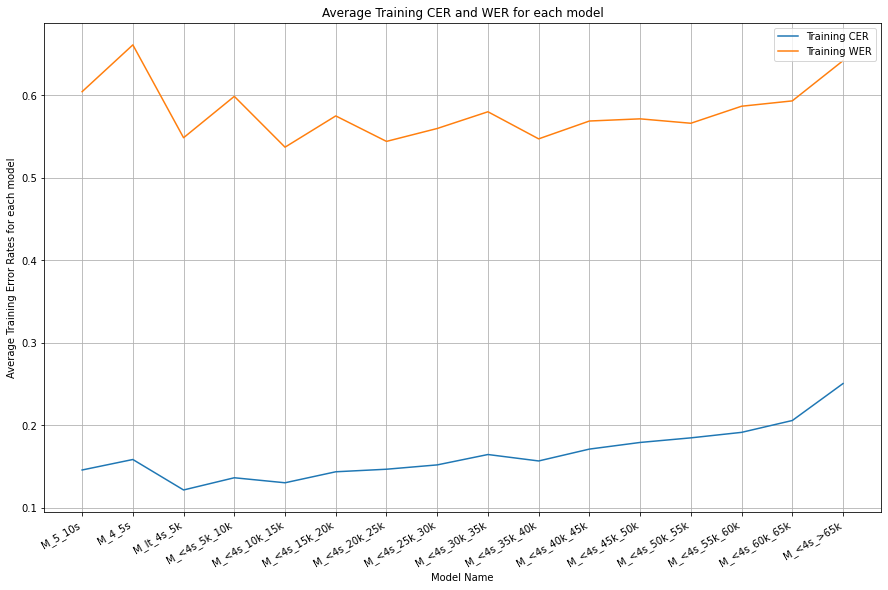

In [12]:
fig = plt.figure(figsize=(15,10))
plt.plot(df2["model_name"],df2["CER"], label="Training CER")
plt.plot(df2["model_name"],df2["WER"], label="Training WER")
plt.xlabel('Model Name')
plt.ylabel('Average Training Error Rates for each model')
plt.title('Average Training CER and WER for each model')
fig.autofmt_xdate()
plt.legend()
plt.grid()
plt.show()

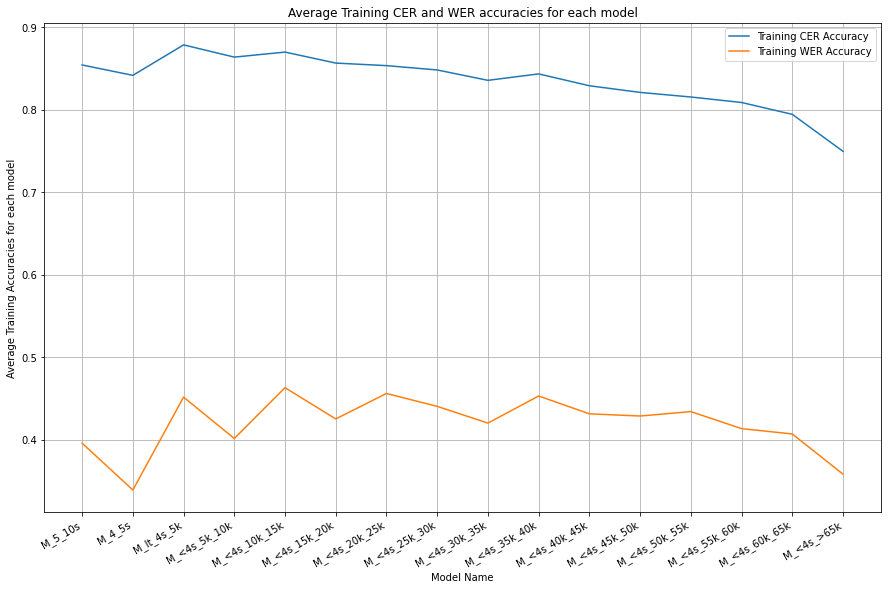

In [11]:
fig = plt.figure(figsize=(15,10))
plt.plot(df2["model_name"],df2["CER Accuracy"], label="Training CER Accuracy")
plt.plot(df2["model_name"],df2["WER Accuracy"], label="Training WER Accuracy")
plt.xlabel('Model Name')
plt.ylabel('Average Training Accuracies for each model')
plt.title('Average Training CER and WER accuracies for each model')
fig.autofmt_xdate()
plt.legend()
plt.grid()
plt.show()

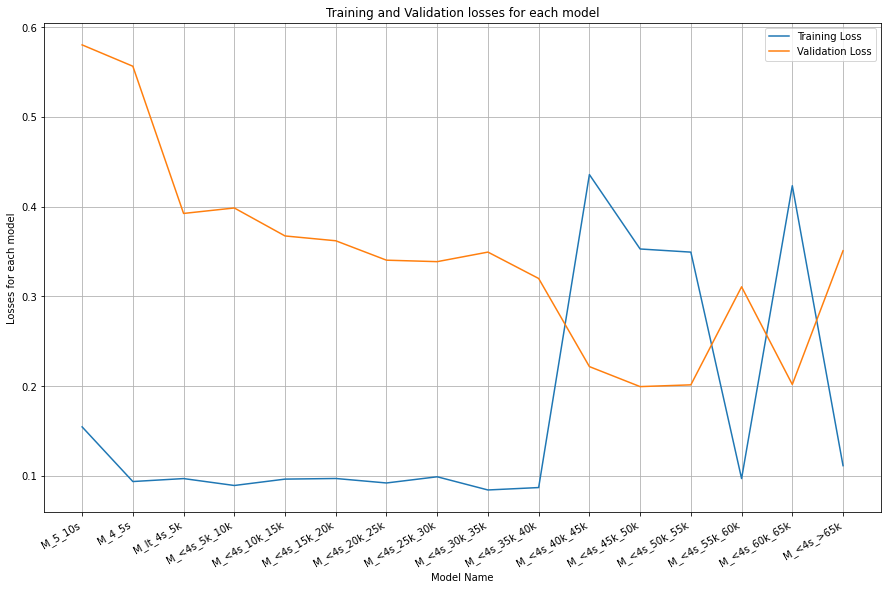

In [13]:
fig = plt.figure(figsize=(15,10))
plt.plot(df2["model_name"],df2["Training Loss"], label="Training Loss")
plt.plot(df2["model_name"],df2["Validation Loss"], label="Validation Loss")
plt.xlabel('Model Name')
plt.ylabel('Losses for each model')
plt.title('Training and Validation losses for each model')
fig.autofmt_xdate()
plt.legend()
plt.grid()
plt.show()

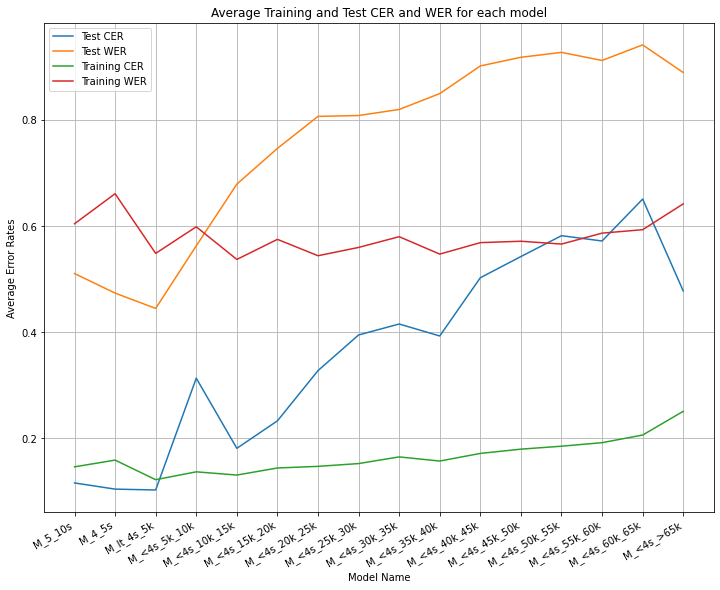

In [8]:
fig = plt.figure(figsize=(12,10))
plt.plot(df1["model_name"],df1["Average CER"], label="Test CER")
plt.plot(df1["model_name"],df1["Average WER"], label="Test WER")
plt.plot(df2["model_name"],df2["CER"], label="Training CER")
plt.plot(df2["model_name"],df2["WER"], label="Training WER")
plt.xlabel('Model Name')
plt.ylabel('Average Error Rates')
plt.title('Average Training and Test CER and WER for each model')
fig.autofmt_xdate()
plt.legend()
plt.grid()
plt.show()

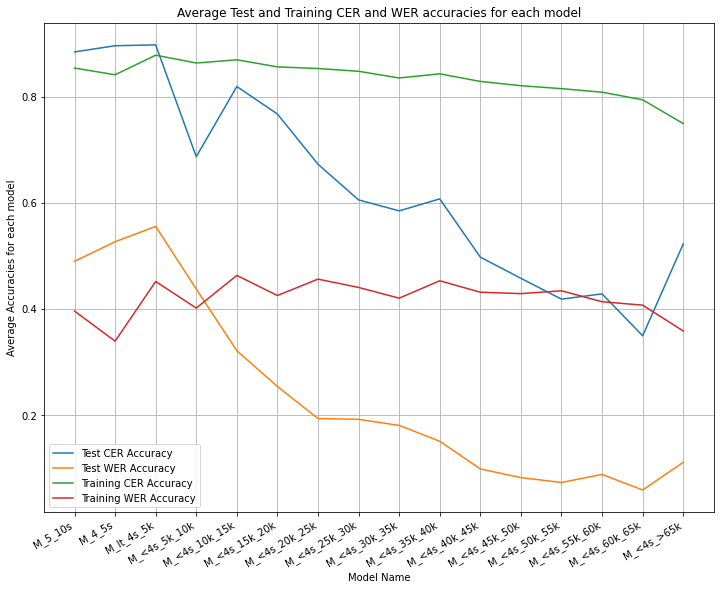

In [9]:
fig = plt.figure(figsize=(12,10))
plt.plot(df1["model_name"],df1["Average CER Accuracy"], label="Test CER Accuracy")
plt.plot(df1["model_name"],df1["Average WER Accuracy"], label="Test WER Accuracy")
plt.plot(df2["model_name"],df2["CER Accuracy"], label="Training CER Accuracy")
plt.plot(df2["model_name"],df2["WER Accuracy"], label="Training WER Accuracy")
plt.xlabel('Model Name')
plt.ylabel('Average Accuracies for each model')
plt.title('Average Test and Training CER and WER accuracies for each model')
fig.autofmt_xdate()
plt.legend()
plt.grid()
plt.show()